# Solución al problema XOR

El problema XOR no puede ser solucionado por un perceptrón simple. Para esto, se introducen capas ocultas que ayudan a transformar los datos de entrada y que se puede determinar regiones de decisión adecuadas. Se ha probado que una red neuronal con una capa oculta es un aproximador universal, lo que quiere decir que, teóricamente, es capaz de aproximar cualquier función de manera adecuada.

En este caso, damos algunas formas de solucionar el problema XOR utilizando capas ocultas, para tranformar los datos hacia un espacio en donde exista un separador lineal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

El problema XOR o OR exclusivo es un problema lógico que se define a partir de la siguiente tabla de verdad:

| $x_1$      | $x_2$ |   $y$   |
| --- | --- | --- |
| 0      | 0       | 0       |
| 0      | 1       | 1       |
| 1      | 0       | 1       |
| 1      | 1       | 0       |
| ----------- | ----------- | ----------- |

Visualmente, esto define los puntos que conforman las aristas de un cuadrado.

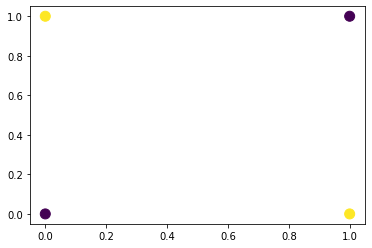

In [2]:
#Puntos en un cuadrado en R2
X = np.array([[0,1],[1,0],[0,0],[1,1]])
#Definición de problema XOR
Y = np.array([1,1,0,0])

#dimensiones de los datos
m,n = X.shape

#Ploteo
plt.scatter(X[:,0], X[:,1], c=Y, s=100)
plt.show()

### Funciones lógicas básicas

El problema XOR es un problema lógico complejo. Los problemas lógicos simples responden a las puertas NOT, AND y OR. Un problema lógico complejo implica que puede expresarse a partir de la combinación de operadores lógicos simples. El XOR, por tanto, puede solucionarse con una composición de los operadores simples. Por tanto, definimos primero estos operadores.

In [3]:
#Perceptrón AND
def AND(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-1.5 > 0)

#Perceptrón OR
def OR(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-0.5 > 0)

#Perceptrón NOT x_1
def NOT1(x):
    try:
        w = np.array([-1,0])
        return 1*(np.dot(x,w) + 0.5 > 0)
    except:
        return 1*(-x + 0.5 > 0)
    
#Perceptrón NOT x_2
def NOT2(x):
    try:
        w = np.array([0,-1])
        return 1*(np.dot(x,w) + 0.5 > 0)
    except:
        return 1*(-x + 0.5 > 0)

Estas funciones, entonces, clasifican los datos según cada uno de los problemas.

In [4]:
print(X)
print(AND(X))
print(OR(X))
print(NOT1(X))

[[0 1]
 [1 0]
 [0 0]
 [1 1]]
[0 0 0 1]
[1 1 0 1]
[1 0 1 0]


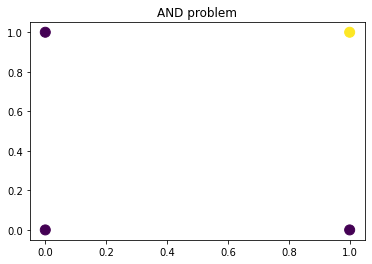

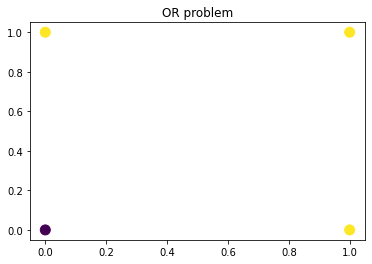

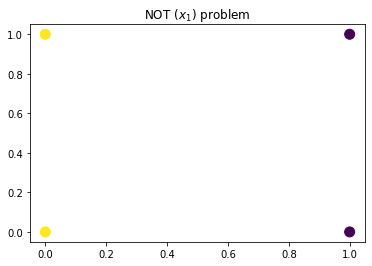

In [5]:
#Ploteo
plt.scatter(X[:,0], X[:,1], c=AND(X), s=100)
plt.title('AND problem')
plt.show()

plt.scatter(X[:,0], X[:,1], c=OR(X), s=100)
plt.title('OR problem')
plt.show()

plt.scatter(X[:,0], X[:,1], c=NOT1(X), s=100)
plt.title('NOT ($x_1$) problem')
plt.show()

### Solución al problema XOR

Definimos una solución al problema XOR de la siguiente forma:

$$XOR(x_1,x_2) = AND\Big( NOT\big(AND(x_1,x_2)\big), OR(x_1,x_2)\Big)$$

Se puede comprobar que esta composición de funciones básicas da como resultado el operador XOR.

Al aplicar esta solución, podemos notar que se realiza una tranformación a los datos; esta tranformación está definida como:

$$h =  \begin{pmatrix} NOT\big(AND(x_1,x_2)\big) \\ OR(x_1,x_2) \end{pmatrix}$$

El resultado de esta tranformación son vectores dos dimensionales, pero en donde los puntos que pertenecen a la clase 1 colapsan en un solo punto $\begin{pmatrix} 1 & 1 \end{pmatrix}$ y los puntos de la clase 0 se mueven a las posiciones de los ejes del plano.

[1 1 0 0]


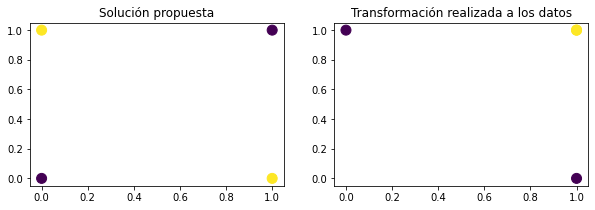

In [6]:
#transformación
h = lambda x: np.array([NOT1(AND(x)), OR(x)]).T
#Función XOR
XOR = lambda x: AND(h(X))
print(XOR(X))

#ploteo
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c=XOR(X), s=100)
plt.title('Solución propuesta')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(h(X)[:,0], h(X)[:,1], c=Y, s=100)
plt.title('Transformación realizada a los datos')
plt.show()

Podemos notar que la nueva configuración de los datos se parece mucho a las posiciones que se dan en el problema AND. Por tanto, la capa de salida es un perceptrón para el problema AND.

Además de esta solución, podemos ver que el problema XOR también puede expresarse de la siguiente forma:

$$XOR(x_1,x_2) = OR\Big( AND\big( x_1, NOT(x_2) \big), AND\big( NOT(x_1), x_2 \big) \Big)$$

En este caso, la transformación que se realiza a los datos es:

$$h =  \begin{pmatrix} AND\big( x_1, NOT(x_2) \big) \\ AND\big( NOT(x_1), x_2 \big) \end{pmatrix}$$

Y la capa de salida es un perceptrón OR.

[1 1 0 0]


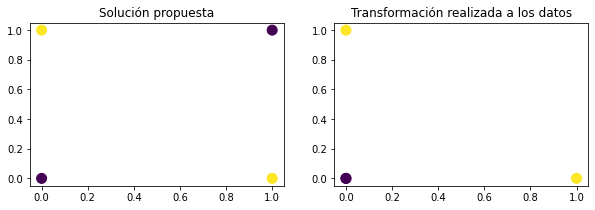

In [7]:
#Transformación
h = lambda x: np.array([AND(np.array([x[:,0], NOT2(x)]).T), AND(np.array([NOT1(x), x[:,1]]).T)]).T
#Definimos función XOR
XOR = lambda x: OR(h(x))
print(XOR(X))

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c=XOR(X), s=100)
plt.title('Solución propuesta')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(h(X)[:,0], h(X)[:,1], c=Y, s=100)
plt.title('Transformación realizada a los datos')
plt.show()

Estas dos soluciones tranforman los datos a un espacio 2-dimensional colapsando ya sea los puntos de un sólo espacio, en general, podemos visualizar las regiones de decisión que se hace con la función XOR que hemos definido. En este caso, la separación obtenida no es lineal.

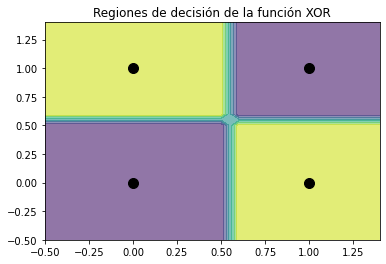

In [8]:
min1, max1 = X[:, 0].min()-0.5, X[:, 0].max()+0.5
min2, max2 = X[:, 1].min()-0.5, X[:, 1].max()+0.5
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = XOR(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.6)

plt.scatter(X[:,0],X[:,1],c='black',s=100)
plt.title('Regiones de decisión de la función XOR')
plt.show()

#### Mapeo a mayores dimensiones

Otra forma de solucionar el problema XOR es mapear los puntos a una mayor dimensión para encontrar allí un hiperplano separador. Esto se puede hacer si asignamos una función $h: \mathbb{R}^2 \to \mathbb{R}^3$, que lleve los puntos a 3 dimensiones.

Asignamos los pesos adecuados, los bias, y las funciones de activación. Los datos en 3 dimensiones podrán ser separados por una capa de salida que corresponde a un perceptrón simple.

[1 1 0 0]


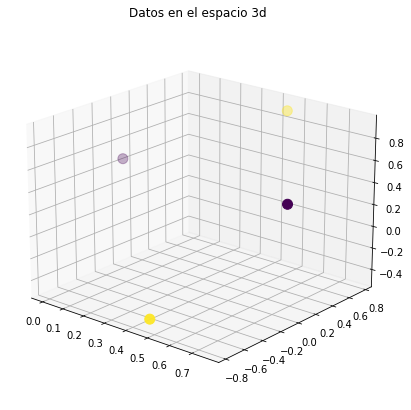

In [9]:
#Pesos de capa oculta
w1 = np.array([[0.5, 1, 1],
              [0.5, -1, -1]])
b1 = np.array([0, 0, 0.5])
#Pesos de salida
w2 = np.array([0, 1.3, -1.6])
b2 = 0.6

#Capa oculta
h = lambda x: np.tanh(np.dot(x,w1) + b1)
#Capa de salida
f = lambda x: 1*(np.dot(h(x),w2) + b2 > 0)
print(f(X))

#Ploteo
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.scatter(h(X)[:,0], h(X)[:,1], h(X)[:,2], c=f(X), s=100)
ax.view_init(20,-50)
plt.title('Datos en el espacio 3d')
plt.show()

Podemos ver las regiones que está función determina:

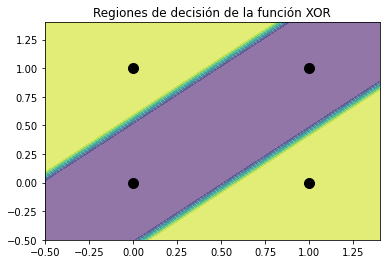

In [10]:
min1, max1 = X[:, 0].min()-0.5, X[:, 0].max()+0.5
min2, max2 = X[:, 1].min()-0.5, X[:, 1].max()+0.5
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = f(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.6)

plt.scatter(X[:,0],X[:,1],c='black',s=100)
plt.title('Regiones de decisión de la función XOR')
plt.show()